In [1]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import numpy as np

%matplotlib inline

In [2]:
vmode_re = re.compile(r'(?P<datetime>\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3})\s+(?P<pthreadid>\d+)\s+(?P<pid>\d+) V homebrain:.* \(\(virtualmode (?P<vmid>\d+)\)\)$')

dts = []
ids = []

def parser(file):
    try:
        with open(file) as f:
            for line in f:
                res = vmode_re.search(line)
                if res is None:
                    continue
                gdict = res.groupdict()
                dt = datetime.strptime(gdict['datetime'], '%m-%d %H:%M:%S.%f').replace(year=2018)
                dts.append(dt)
                ids.append(int(gdict['vmid']))

    except IOError as e:
        raise e
      

In [3]:
parser('./logcat.log.01')

In [4]:
# s = pd.Series(data=ids, index=dts)
# s.plot(kind='bar', rot=15)

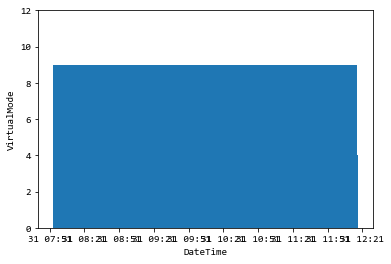

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# ax.plot(dts, ids, 'ro', markersize=12)

plt.bar(dts, ids, width=1/5.5)
# plt.grid(True)
plt.xlabel('DateTime')
plt.ylabel('VirtualMode')
plt.ylim(0, 12)
# plt.axvline(x=dts[0], ymax=4)
# ax.add_line(Line2D([1, 0], [2, ids[0]]))
# ax.fill_between(x=dts, y1=ids)
# ax.fill(dts, ids, 'b')
plt.show()

<BarContainer object of 8 artists>

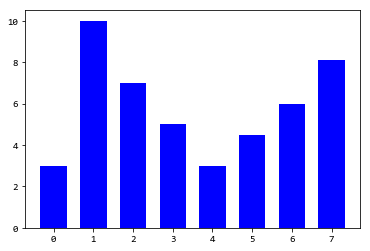

In [6]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")

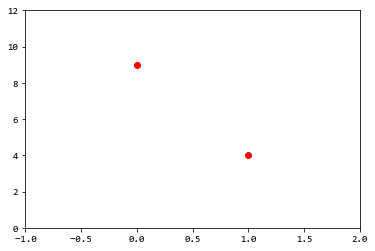

In [7]:
plt.subplot(111)
# remove x,y axis mark
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')
xdata = np.arange(0, len(dts))
plt.plot(xdata, ids, 'ro')
plt.xlim(-1, len(dts))
plt.ylim(0, 12)
plt.show()